In [1]:
import  numpy as np
from matplotlib import pyplot as plt

In [2]:
file = open("q.txt")
data = file.read()

In [3]:
x = []
y = []
for line in data.split("\n"):
    x.append(np.float(line.split(",")[0]))
    y.append(np.float(line.split(",")[1]))

C:\Users\zara\AppData\Local\Temp\ipykernel_2084\3422459984.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x.append(np.float(line.split(",")[0]))
C:\Users\zara\AppData\Local\Temp\ipykernel_2084\3422459984.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y.append(np.float(line.split(",")[1]))


In [5]:
x = np.array(x[0:150])
y = np.array(y[0:150])

In [4]:
len(x)

149

In [6]:
xy  = np.concatenate(([x],[y]),0)

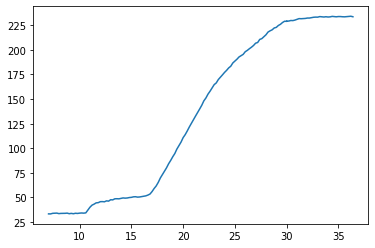

In [7]:
plt.plot(xy[0],xy[1])

In [20]:
def linear(x,y):
    xybar = np.average( x*y)
    xbar = np.average(x)
    ybar = np.average(y)
    x2bar = np.average(np.power(x,2))
    k = (xybar -xbar*ybar)/(x2bar - xbar**2)
    k = 0
    b = ybar - k*xbar
    return k,b

In [21]:
def loss(x,y):
    k,b = linear(x,y)
    yy = k*x+b
    l = np.average(np.power(y-yy,2))
    return  l

In [32]:
xy = np.sort(xy,1)

In [22]:
startlinearloss = []
endlinearloss = []
for i in range(120):
    startlinearloss.append([x[i+1],loss(x[0:i+2],y[0:i+2])])
    endlinearloss.append([x[140-i-2], loss(x[140 - i -2:140],y[140 -i -2:140])])
    # print(i,200-i-2,x[200-i-2],loss(x[200-i-2:200],y[200-i-2:200]))

In [23]:
startlinearloss = np.array(startlinearloss)
endlinearloss = np.array(endlinearloss)

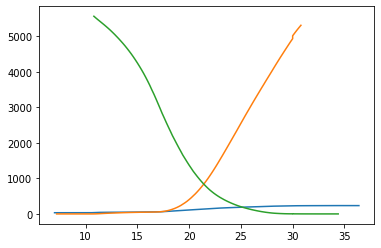

In [24]:
plt.plot(xy[0],xy[1],startlinearloss[:,0],startlinearloss[:,1], endlinearloss[:,0], endlinearloss[:,1])

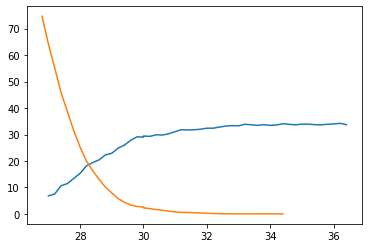

In [33]:
plt.plot(xy[0][100:149],xy[1][100:149]-200,endlinearloss[0:40,0],endlinearloss[0:40,1])

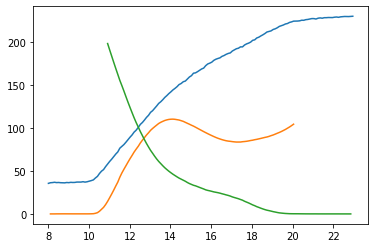

In [35]:
plt.plot(x[0:150],y[0:150],startlinearloss[:,0],startlinearloss[:,1],endlinearloss[:,0],endlinearloss[:,1])

In [25]:
startlinearlossdiff = startlinearloss[0:110] +startlinearloss[1:111]+startlinearloss[2:112]+startlinearloss[3:113]+startlinearloss[4:114]-10*startlinearloss[5:115]+startlinearloss[6:116]+startlinearloss[7:117]+startlinearloss[8:118]+startlinearloss[9:119]

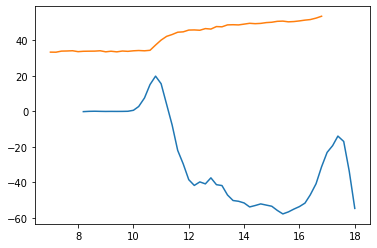

In [27]:
plt.plot(startlinearloss[5:55,0],startlinearlossdiff[0:50,1],xy[0][0:50],xy[1][0:50])

In [28]:
endlinearlossdiff =  endlinearloss[0:110] +endlinearloss[1:111]+endlinearloss[2:112]+endlinearloss[3:113]+endlinearloss[4:114]-10*endlinearloss[5:115]+endlinearloss[6:116]+endlinearloss[7:117]+endlinearloss[8:118]+endlinearloss[9:119]

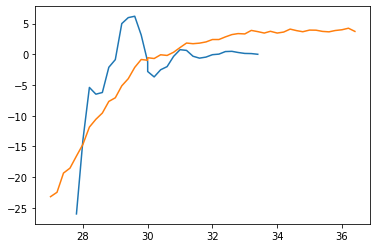

In [30]:
plt.plot(endlinearloss[5:35,0],endlinearlossdiff[0:30,1],xy[0][100:150],xy[1][100:150]-230)

In [34]:
str_x = ""
for i in range(150):
    str_x += str(x[i])
    str_x += ", "
str_x += x[150]


TypeError: can only concatenate str (not "numpy.float64") to str